# Get Immutable Reference Benchmarks

In [2]:
# select measurement file
file_name = "../output/2024-12-23 17-19-30.json"

# plot settings
show_error_bar = False
unit = "ms"
plotted_object_sizes = [32, 128, 512]

In [3]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [71]:
from util.convert import convert_datasets
import pandas as pd

ovpm = convert_datasets(
    raw_data,
    "vNV-Heaps",
    [("get_min", "Best Case"), ("get_max_min", "Worst-Best Case"), ("get_min_max", "Best-Worst Case"), ("get_max", "Worst Case")],
    ["mean", "min", "max", "options.object_size", "options.blocker_size", "options.blocker_count", "options.modules", "machine_name", "cold_start", "repetitions"],
    unwrapped=show_error_bar
)

baseline = convert_datasets(
    raw_data,
    "Baseline",
    [("baseline_get_min", "Best Case"), ("baseline_get_max_min", "Worst-Best Case"), ("baseline_get_min_max", "Best-Worst Case"), ("baseline_get_max", "Worst Case")],
    ["mean", "min", "max", "options.object_size", "options.bucket_size", "options.modules", "machine_name", "cold_start", "repetitions"],
    unwrapped=show_error_bar
)

dataset = pd.concat([ovpm, baseline])
dataset.head()

,mean,min,max,options.object_size,options.blocker_size,options.blocker_count,options.modules,machine_name,cold_start,repetitions,ticks_per_ms,dataset_type,benchmark_title,benchmark_id,options.bucket_size
0,914.1,914,915,8,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,vNV-Heaps,Best Case,get_min,NaN
1,920.4,914,978,16,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,vNV-Heaps,Best Case,get_min,NaN
2,851.2,851,852,32,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,vNV-Heaps,Best Case,get_min,NaN
3,914.3,914,915,48,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,vNV-Heaps,Best Case,get_min,NaN
4,915.0,915,915,64,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,vNV-Heaps,Best Case,get_min,NaN


In [5]:
from util.convert import display_dataset_infos

display_dataset_infos(dataset)

min    37.3375
max    65.4875
Name: mean, dtype: float64

min    33.375
max    68.850
Name: mean, dtype: float64

min      567.85625
max    12381.08125
Name: mean, dtype: float64

min    20284.36875
max    32664.50000
Name: mean, dtype: float64

# Final Plot

{'figure.facecolor': 'white', 'axes.labelcolor': '.15', 'xtick.direction': 'out', 'ytick.direction': 'out', 'xtick.color': '.15', 'ytick.color': '.15', 'axes.axisbelow': True, 'grid.linestyle': '-', 'text.color': '.15', 'font.family': ['sans-serif'], 'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'], 'lines.solid_capstyle': 'round', 'patch.edgecolor': 'w', 'patch.force_edgecolor': True, 'image.cmap': 'rocket', 'xtick.top': False, 'ytick.right': False, 'axes.grid': True, 'axes.facecolor': 'white', 'axes.edgecolor': '#ddd', 'grid.color': '#ddd', 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': False, 'axes.spines.top': False, 'xtick.bottom': False, 'ytick.left': False}


/home/markus/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  self._figure.tight_layout(*args, **kwargs)


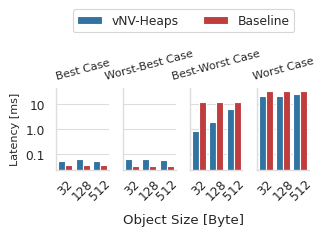

In [118]:
from util.plot import set_theme, plot_colors, save_plot
from util.convert import scale_and_filter_data
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import FuncFormatter

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


palette = set_theme(colors=2)
palette = [palette[1], palette[0]]
sns.set_palette(palette=palette)

unit = "ms"
filtered = scale_and_filter_data(dataset, unit, plotted_object_sizes)


g = sns.catplot(
    data=filtered,
    kind="bar",
    x="options.object_size", y="mean", hue="dataset_type", col="benchmark_title",
    col_wrap=4,
    errorbar="sd", alpha=1, aspect=(1/2)*(3.3/4), height=2, width=0.8
)
g.set_titles("{col_name}")
g.set(xlabel=None, ylabel='Latency [ms]')
g.tight_layout(pad=0)
g.legend.set_title("\nMeasurement")
plt.yscale('log')

def format_float(value, pos):
    if value == int(value) and value != 1:
        return str(int(value))
    else:
        return str(value)

for ax in g.axes:
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, y=0.05, ha="center")
    ax.set_title(ax.get_title(), rotation = 15)
    ax.yaxis.set_major_formatter(FuncFormatter(format_float))

#axins = zoomed_inset_axes(g.axes[0], 2, loc=1) # zoom = 6
g.figure.supxlabel("Object Size [Byte]",x=0.42, y=0.05)
g.tight_layout()
catplot_handles = g.legend.set(visible=False)

plt.legend(
    loc = "lower center",
    bbox_to_anchor=(-1.4, 1.6),
    ncol=2,
    title=None,
    frameon=True
)

save_plot("accessing_data", False)